In [37]:
# Importing neccessary pacakages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.filterwarnings("ignore")

In [126]:
#Reading dataset
jobDataSet = pd.read_csv('C:/Users/welcome/Documents/Vishal/jobs.csv')

In [127]:
#Viewing the dataset top few rows
jobDataSet.head()

,Unnamed: 0,treat,econ_hard,depress1,sex,age,occp,marital,nonwhite,educ,income,job_seek,depress2,work1,comply,control,job_dich,job_disc
0,1,1,3.00,1.91,1,34.167122,professionals,married,non.white1,gradwk,50k+,4.833333,1.727273,psyemp,0,treat,1,4
1,2,1,3.67,1.36,0,26.101370,operatives/kindred wrks,nevmarr,white0,somcol,15t24k,3.833333,2.000000,psyemp,0,treat,0,3
2,3,1,4.00,2.09,1,35.021919,operatives/kindred wrks,nevmarr,non.white1,somcol,25t39k,4.500000,2.181818,psyump,0,treat,1,4
3,4,0,2.33,1.45,0,27.487671,manegerial,married,white0,bach,25t39k,3.666667,1.545455,psyump,0,control,0,3
4,5,1,1.33,1.73,1,31.610958,clerical/kindred,separtd,non.white1,highsc,25t39k,2.500000,2.363636,psyump,1,treat,0,2


In [128]:
#Removing the unwanted columns
jobDataSet = jobDataSet.drop(['Unnamed: 0'],axis=1)

In [129]:
#Viewing the dataset top few rows
jobDataSet.head()

,treat,econ_hard,depress1,sex,age,occp,marital,nonwhite,educ,income,job_seek,depress2,work1,comply,control,job_dich,job_disc
0,1,3.00,1.91,1,34.167122,professionals,married,non.white1,gradwk,50k+,4.833333,1.727273,psyemp,0,treat,1,4
1,1,3.67,1.36,0,26.101370,operatives/kindred wrks,nevmarr,white0,somcol,15t24k,3.833333,2.000000,psyemp,0,treat,0,3
2,1,4.00,2.09,1,35.021919,operatives/kindred wrks,nevmarr,non.white1,somcol,25t39k,4.500000,2.181818,psyump,0,treat,1,4
3,0,2.33,1.45,0,27.487671,manegerial,married,white0,bach,25t39k,3.666667,1.545455,psyump,0,control,0,3
4,1,1.33,1.73,1,31.610958,clerical/kindred,separtd,non.white1,highsc,25t39k,2.500000,2.363636,psyump,1,treat,0,2


In [130]:
#Viewing the column data type
jobDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 17 columns):
treat        899 non-null int64
econ_hard    899 non-null float64
depress1     899 non-null float64
sex          899 non-null int64
age          899 non-null float64
occp         899 non-null object
marital      899 non-null object
nonwhite     899 non-null object
educ         899 non-null object
income       899 non-null object
job_seek     899 non-null float64
depress2     899 non-null float64
work1        899 non-null object
comply       899 non-null int64
control      899 non-null object
job_dich     899 non-null int64
job_disc     899 non-null int64
dtypes: float64(5), int64(5), object(7)
memory usage: 119.5+ KB


In [131]:
# Ensuring null value
jobDataSet.isnull().sum()

treat        0
econ_hard    0
depress1     0
sex          0
age          0
occp         0
marital      0
nonwhite     0
educ         0
income       0
job_seek     0
depress2     0
work1        0
comply       0
control      0
job_dich     0
job_disc     0
dtype: int64

In [136]:
#  jobDataSet

In [133]:
# Categorizing the label for identifying different variable inisghts
def normalizingRange(x):
    if x <= 1:
        return 1
    elif x <= 2 and x >1:
        return 2
    elif x <= 3  and x >2:
        return 3
    elif x <= 4  and x >3:
        return 4
    else:
        return 5

jobDataSet['job_seek'] = jobDataSet['job_seek'].apply(normalizingRange)
jobDataSet['work1'] = jobDataSet['work1'] .apply(lambda x: 1 if x=='psyemp' else 0)
jobDataSet['depress2'] = jobDataSet['depress2'] .apply(normalizingRange)
jobDataSet['depress1'] = jobDataSet['depress1'] .apply(normalizingRange)

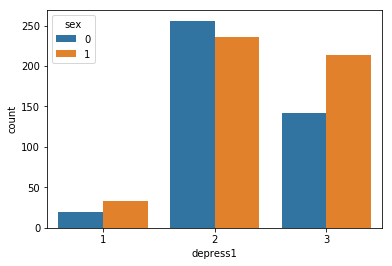

In [137]:
# 1. Identifying the count for the varaible depress1(pre-treatment) against Male/Female 0/1

# We have splitted the label in the range form such as 0-1 belongs 1, 1-2 belongs 2, 2-3 belongs 3
# Counting the number of people and checking againt the response variable
sns.countplot(x="depress1",hue="sex", data=jobDataSet)

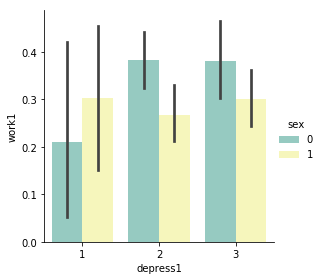

In [144]:
# 2. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  agianst Depress1 and Sex predictor variables

# In the below graph we see the representation of three variables 
#Depression pre-treatment
sns.factorplot(x="depress1", y="work1", data=jobDataSet, hue="sex",kind="bar", size =4, palette = "Set3")

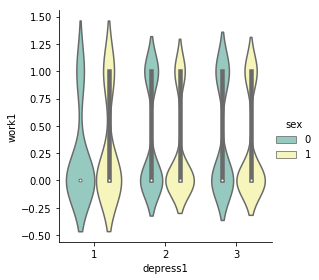

In [145]:
sns.factorplot(x="depress1", y="work1", data=jobDataSet, hue="sex",kind="violin", size =4, palette = "Set3")

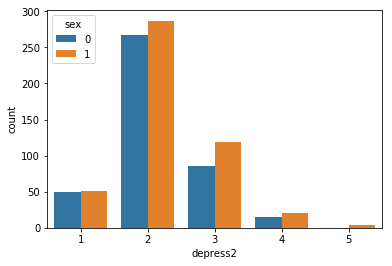

In [230]:
# 3. Identifying the count for the varaible depress2(post-treatment) against Male/Female 0/1
#Depression 2 post treatment
sns.countplot(x="depress2",hue="sex", data=jobDataSet)

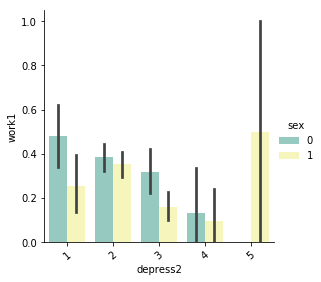

In [151]:
# 4. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  agianst Depress2 and Sex (predictor variables)
# Can observe that in the scale of 1 to 5, Female are only standing in scale 5
sns.factorplot(x="depress2", y="work1", data=jobDataSet, hue="sex",kind="bar", size =4, palette = "Set3")
plt.xticks(rotation=40);

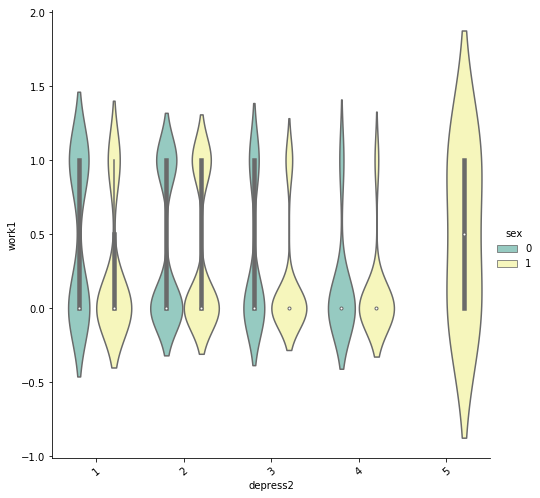

In [149]:
sns.factorplot(x="depress2", y="work1", data=jobDataSet, hue="sex",kind="violin", size =7, palette = "Set3")
plt.xticks(rotation=40);

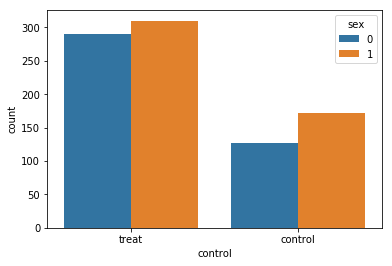

In [152]:
# 5. Identifying the count for the varaible control(treat/control) against Male/Female 0/1
# Treat are the one who had been picked up randomly for the Jobs training program, control are the one who picked up randomly,
# Female were the one who was more than male, which had been picked up randomly.
sns.countplot(x="control",hue="sex", data=jobDataSet)

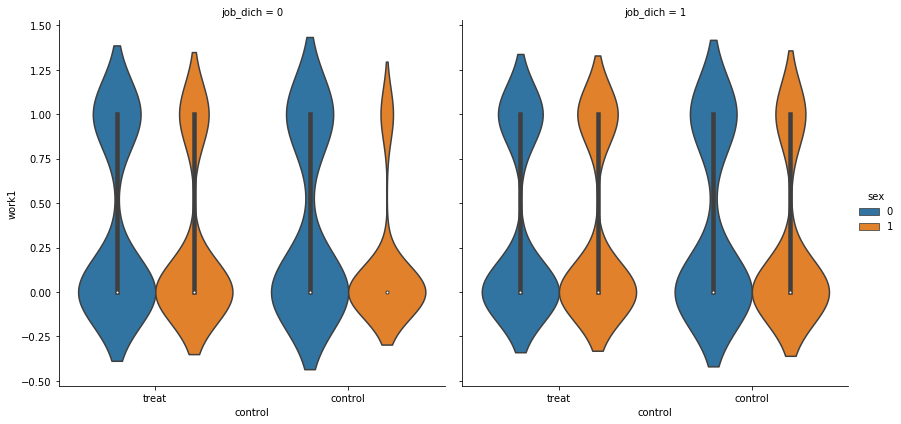

In [153]:
# 6. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  agianst job_dich, control and Sex (predictor variables)

#Checking againt the different variable i.e control and job dich from jobs training program
sns.factorplot(x="control", y="work1", data=jobDataSet, hue="sex",kind="violin", size =6, scale="width", col="job_dich")

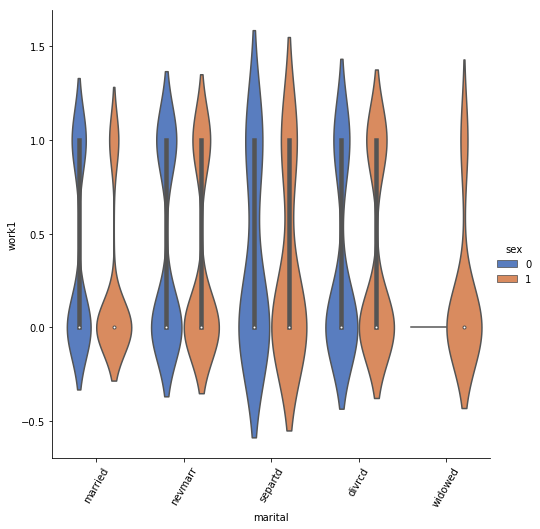

In [154]:
#Against Marital Status
sns.factorplot(x="marital",y="work1",hue="sex",data=jobDataSet,kind="violin", size = 7, palette = "muted")
plt.xticks(rotation=60);

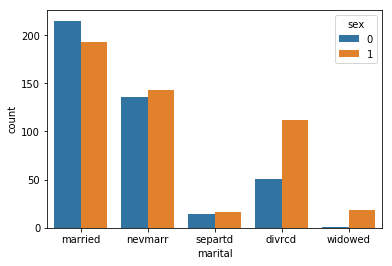

In [226]:
# 7. Identifying the count for the varaible marital against Male/Female 0/1

sns.countplot(x="marital",hue="sex", data=jobDataSet)

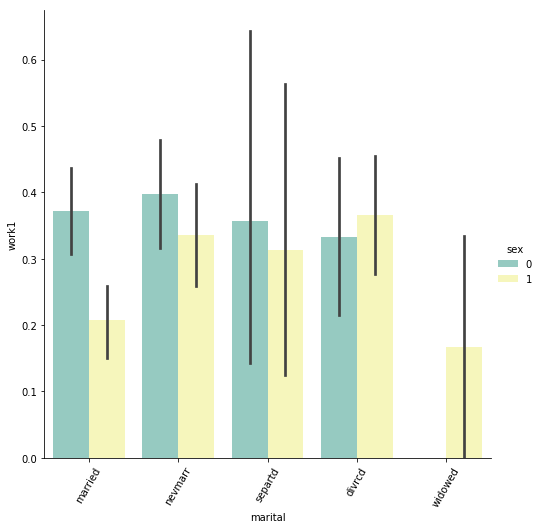

In [156]:
# 8. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  marital and Sex (predictor variables)
# Married and Never married male are the one who had been employed more then female 
sns.factorplot(x="marital",y="work1",hue="sex",data=jobDataSet,kind="bar", size = 7, palette = "Set3")
plt.xticks(rotation=60);

In [160]:
#Against occupution
# sns.factorplot(x="occp",y="work1",hue="sex",data=jobDataSet,kind="violin", size = 10, palette = "muted")
# plt.xticks(rotation=100);

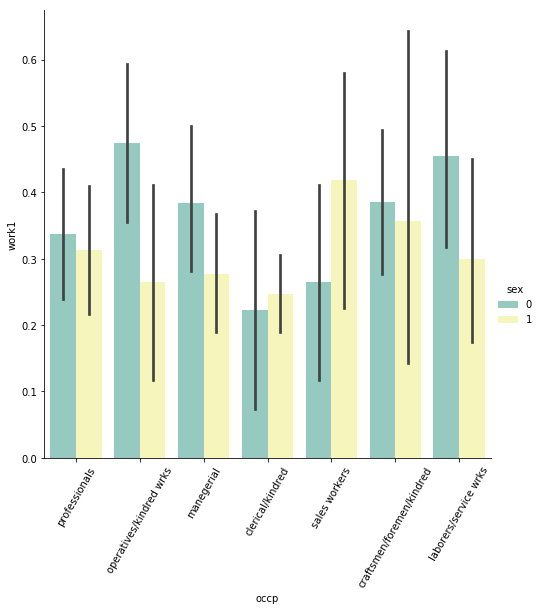

In [157]:
# 9. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  occupation and Sex (predictor variables)
# Except sales workers, in all other field Male are the one who has been employed
sns.factorplot(x="occp",y="work1",hue="sex",data=jobDataSet,kind="bar", size = 7, palette = "Set3")
plt.xticks(rotation=60);

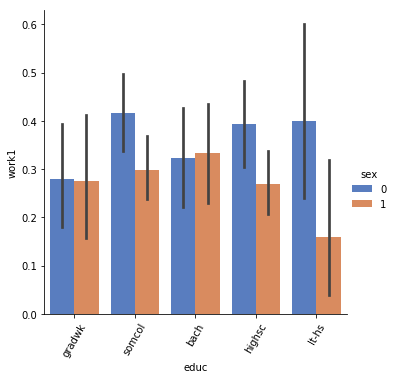

In [161]:
# 10. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  education and Sex (predictor variables)

sns.factorplot(x="educ",y="work1",hue="sex",data=jobDataSet,kind="bar", size = 5, palette = "muted")
plt.xticks(rotation=60);

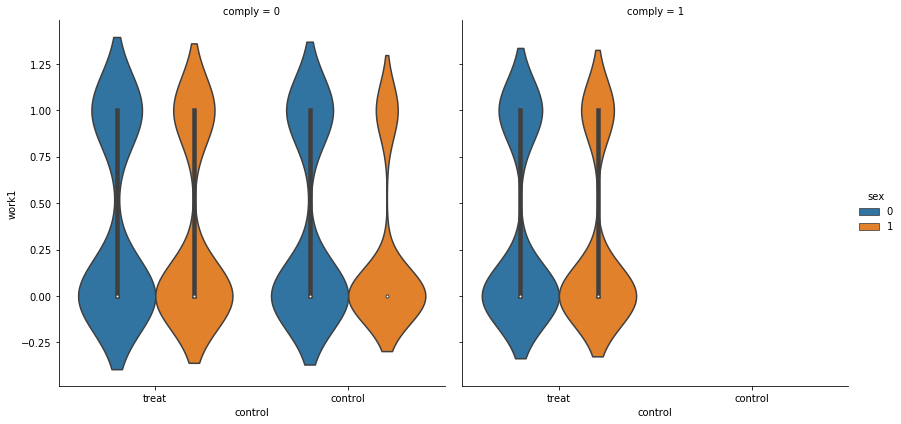

In [162]:
# 11 Identifying the comply, after the person has been enrolled for the job proram.

#Checking againt the different variable i.e control and comploy for jobs training program
sns.factorplot(x="control", y="work1", data=jobDataSet, hue="sex",kind="violin", size =6, scale="width", col="comply")

In [123]:

# jobDataSet

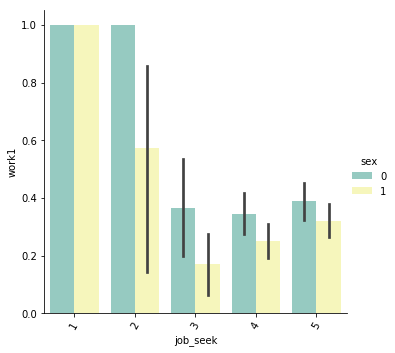

In [165]:
# 11. Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  job_seek in the scale of 1 to 5
# and Sex (predictor variables)

sns.factorplot(x="job_seek",y="work1",hue="sex",data=jobDataSet,kind="bar", size = 5, palette = "Set3")
plt.xticks(rotation=60);

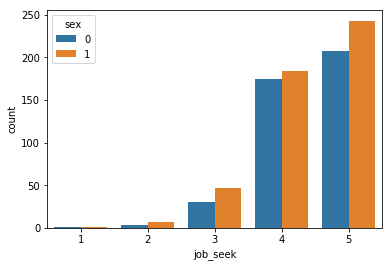

In [213]:
sns.countplot(x="job_seek",hue="sex", data=jobDataSet)

In [ ]:
# 12. Which algorithm we can choose and why.
# Since we are dealing with categorical variable, so we can implement the Supervised Algorithm given that we have the label set
# as True/False, Logistic regerssion would suffice this problem, Implementation are as below.

In [180]:
jobDataSet.groupby('work1').mean()

,treat,econ_hard,depress1,sex,age,job_seek,depress2,comply,job_dich,job_disc
work1,,,,,,,,,,
0,0.648515,3.032393,2.328383,0.569307,38.723419,4.376238,2.270627,0.410891,0.600660,3.089109
1,0.706485,3.007065,2.354949,0.467577,35.169283,4.409556,2.078498,0.419795,0.651877,3.201365


In [181]:
jobDataSet.groupby('depress1').mean()

,treat,econ_hard,sex,age,job_seek,depress2,work1,comply,job_dich,job_disc
depress1,,,,,,,,,,
1,0.750000,2.346538,0.634615,40.561696,4.442308,1.653846,0.269231,0.423077,0.653846,3.288462
2,0.674797,2.825264,0.479675,37.412930,4.424797,2.048780,0.327236,0.408537,0.656504,3.176829
3,0.645070,3.399014,0.600000,37.336963,4.326761,2.509859,0.332394,0.419718,0.557746,3.030986


In [182]:
jobDataSet.groupby('depress2').mean()

,treat,econ_hard,depress1,sex,age,job_seek,work1,comply,job_dich,job_disc
depress2,,,,,,,,,,
1,0.663366,2.789208,1.861386,0.504950,38.948705,4.653465,0.366337,0.376238,0.841584,3.495050
2,0.680505,2.943502,2.297834,0.518051,37.457233,4.406137,0.368231,0.440433,0.637184,3.166065
3,0.651961,3.254755,2.602941,0.583333,37.309468,4.245098,0.225490,0.362745,0.470588,2.897059
4,0.555556,3.508889,2.694444,0.583333,37.506697,4.166667,0.111111,0.388889,0.555556,2.777778
5,0.750000,4.000000,3.000000,1.000000,31.123287,4.250000,0.500000,0.500000,0.250000,3.000000


In [184]:
from patsy import dmatrices
y, X = dmatrices('work1 ~ depress1 + depress2 + age + sex + comply + job_dich + job_disc + econ_hard', jobDataSet, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'depress1', 'depress2', 'age', 'sex', 'comply', 'job_dich',
       'job_disc', 'econ_hard'],
      dtype='object')


In [185]:
#flattern y into a 1-D array
y = np.ravel(y)

In [186]:
#fit X and y with Logistic Regression
model = LogisticRegression()
model = model.fit(X,y)

#check accuracy on the training set
# The model accuracy is around 67%
model.score(X,y)

0.6763070077864294

In [188]:
y.mean()

0.3259176863181313

In [189]:
pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,Intercept,[0.27805229894685135]
1,depress1,[0.3364409242898635]
2,depress2,[-0.4625582078980037]
3,age,[-0.03597488405279822]
4,sex,[-0.3811708552584382]
5,comply,[0.06825508157771193]
6,job_dich,[-0.02830211704105892]
7,job_disc,[0.18534406024780958]
8,econ_hard,[-0.04499233242339232]


In [190]:
#model evaluation by train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [192]:
#predict labels for  test set
predicted = model2.predict(X_test)
# print(predicted)

In [194]:
#Generate class probabilities
probs = model2.predict_proba(X_test)
# probs

In [225]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:,1]))
#The accuracy is 66% , which is the same as we experienced when training and predicting on the same data

0.6592592592592592
0.675867122618466


In [196]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[172   6]
 [ 86   6]]
              precision    recall  f1-score   support

         0.0       0.67      0.97      0.79       178
         1.0       0.50      0.07      0.12        92

   micro avg       0.66      0.66      0.66       270
   macro avg       0.58      0.52      0.45       270
weighted avg       0.61      0.66      0.56       270



In [198]:
from sklearn.model_selection import cross_val_score
# evaluate the model using cross-validation
scores = cross_val_score(LogisticRegression(),X,y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean)

[0.7032967  0.69230769 0.59340659 0.65555556 0.71111111 0.7
 0.6741573  0.60674157 0.65168539 0.6741573 ]
<built-in method mean of numpy.ndarray object at 0x0000017CC95478A0>


In [224]:
model.predict_proba(np.array([[1,1,0,0,0,0,0,0,0]]))

array([[0.2905848, 0.7094152]])